In [36]:
import numpy as np
import cv2
import os.path

path = os.getcwd()
if "face-recognition" not in path:
    path = path + "/src/com/guangqiang/face-recognition"

os.chdir(path)
print(path)

class MetaData:
    def __init__(self, base, name, file):
        self.base = base
        self.name = name
        self.file = file
        
    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    

def load_metadata(path):
    data = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            ext = os.path.splitext(f)[1]
            if ext == ".png" or ext == ".jpg" or ext == ".jpeg":
                data.append(MetaData(path, i, f))
    return np.array(data)               
                
metadatas = load_metadata("images/marvel")
print(metadatas.size)
print(metadatas[0].image_path())

def load_image(path):
    img = cv2.imread(path, 1)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


/Users/eric/Coding/Workspaces/Python/TensorFlowStudying/src/com/guangqiang/face-recognition
5
images/marvel/Iron_Man/Iron_Man_005.jpeg


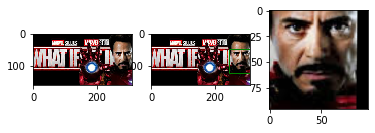

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

img = load_image(metadatas[1].image_path())
alignment = AlignDlib("landmarks.dat")  # 初始化 OpenFace人脸对齐工具, 使用Dlib提供的68个关键点
bounding = alignment.getLargestFaceBoundingBox(img)

face = alignment.align(96, img, bounding, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

plt.subplot(131)
plt.imshow(img)

plt.subplot(132)
plt.imshow(img)
plt.gca().add_patch(patches.Rectangle((bounding.left(), bounding.top()), bounding.width(), bounding.height(),
                                      fill=False, color='green'))

plt.subplot(133)
plt.imshow(face)
